<a href="https://colab.research.google.com/github/prashantmane091318/Computer_Vision/blob/main/deep9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
data=tf.keras.datasets.mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
ytest.shape

(10000,)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_train=xtrain.reshape(-1,28,28,1)/255.0

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test=xtest.reshape(-1,28,28,1)/255.0

In [ ]:
xtrain.shape

In [ ]:
x_train=xtrain.reshape(60000,-1)/255.0

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test=xtest.reshape(10000,-1)/255.0

In [ ]:
y_train=tf.keras.utils.to_categorical(ytrain)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model.add(Conv2D(32,(3,3),strides=(1,1),padding="valid",activation="relu",input_shape=(28,28,1)))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(100,activation="relu"))

In [ ]:
model.add(Dense(10,activation="relu"))

In [ ]:
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2248 - accuracy: 0.9331
Epoch 2/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0659 - accuracy: 0.9801
Epoch 3/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0440 - accuracy: 0.9867
Epoch 4/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0296 - accuracy: 0.9909
Epoch 5/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0224 - accuracy: 0.9931
Epoch 6/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0165 - accuracy: 0.9945
Epoch 7/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 8/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0111 - accuracy: 0.9965
Epoch 9/50
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 10/50
1875/1875 [==============================] - 29s 15m

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1467 - accuracy: 0.9812


[0.14674825966358185, 0.9811999797821045]

In [ ]:
y_test=tf.keras.utils.to_categorical(ytest)

In [ ]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
yp=model.predict(x_test).argmax(axis=1)

In [ ]:
yp

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
sum(yp==ytest)

9812

In [ ]:
import cv2

In [ ]:
img=cv2.imread("/content/77.jpg")

In [ ]:
img.shape

(177, 225, 3)

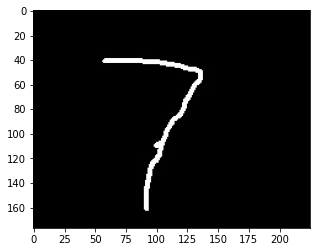

In [ ]:
plt.imshow(img)

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
img.shape

(177, 225)

In [ ]:
img=cv2.resize(img,(28,28))

In [ ]:
img.shape

(28, 28)

In [ ]:
model.predict(img.reshape(1,784)).argmax()

7

In [ ]:
image=["/content/0.jpg","/content/1.jpg","/content/2.jpg","/content/3.jpg","/content/4.jpg","/content/5.jpg","/content/6.jpg","/content/77.jpg","/content/8.jpg","/content/9.jpg"]

In [ ]:
predict=[]
for img in image:
  im=cv2.imread(img)
  im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
  im=cv2.resize(im,(28,28))
  pr=model.predict(im.reshape(1,28,28,1)).argmax()
  predict.append(pr)

In [ ]:
predict

[0, 0, 2, 3, 5, 5, 8, 7, 3, 8]

In [ ]:
def predict_image(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img=cv2.resize(img,(28,28))

  return model.predict(img.reshape(1,28,28,1)).argmax()

In [ ]:
for name in image:
  val=predict_image(name)
  print(val)

0
0
2
3
5
5
8
7
3
8


In [ ]:
model_json=model.to_json()

In [ ]:
file=open("file.json","w")

In [ ]:
file.write(model_json)

2056

In [ ]:
model.save_weights("model_weight.h5")

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
file=open("file.json","r")

In [ ]:
model1=file.read()

In [ ]:
load_model=model_from_json(model1)

In [ ]:
load_model.load_weights("model_weight.h5")

In [ ]:
load_model.predict(x_test[0].reshape(1,784)).argmax()

7